# 27. Метод разделимых наименьших квадратов. Квантовые дефекты

## Постановка задачи

Суть вышеназванного метода - сумма квадратов отклонений фактических значений функции Y от значений, найденных по уравнению регрессии, должна быть наименьшей.

Рассмотрим этот метод на примере квантовых дефектов в атомах йода.
Данные из исследований мы имеем.

Предиктор  𝑥  – возбужденное состояние энергии.
Переменная отклика  𝑦  – число квантовых дефектов.

In [1]:
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [2]:
def formula (x, b1, b2, b3, b4):
    return b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi)

In [3]:
x_initial_data = np.array([-4868.68, -4868.09, -4867.41, -3375.19, -3373.14, -3372.03, -2473.74, -2472.35, 
                   -2469.45, -1894.65, -1893.40, -1497.24, -1495.85, -1493.41, -1208.68, -1206.18, 
                   -1206.04, -997.92, -996.61, -996.31, -834.94, -834.66, -710.03, -530.16, -464.17])
y_initial_data = np.array([0.252429, 0.252141, 0.251809, 0.297989, 0.296257, 0.295319, 0.339603, 0.337731,
                   0.333820, 0.389510, 0.386998, 0.438864, 0.434887, 0.427893, 0.471568, 0.461699, 
                   0.461144, 0.513532, 0.506641, 0.505062, 0.535648, 0.533726, 0.568064, 0.612886, 0.624169])

## Начало работы

Для начала построим точечный график функции (такой точечный график называют корреляционным полем)

Затем (по методу наименьших разделимых квадратов) подберем
прямую линию, которая ближе всего расположена к точкам. Согласно вышеуказанному методу, линия выбирается так, чтобы сумма квадратов расстояний по вертикали между точками и этой линией была бы минимальной.

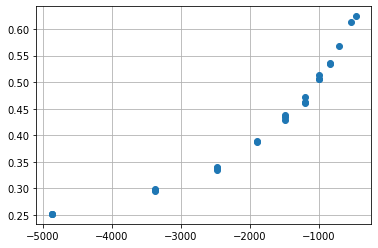

In [4]:
plt.plot(x_initial_data, y_initial_data, 'o')
plt.grid()

## Сбор данных (используя метод наименьших разделимых квадратов)

#### (1)Найдем числовые значения параметров функции

In [5]:
form_gr, tmp = curve_fit(formula, x_initial_data, y_initial_data)
form_gr

array([ 2.01968489e-01, -6.19532468e-06,  1.20445636e+03, -1.81343092e+02])

##### (2) Найдем для точек разбиения (20 точек с интервалом в 0.1) значения остальных параметров, при которых значения функции является наименьшим
(b3 = 1204)  // или 1.20445636e+03

In [6]:
split_points = np.array ([1203.1, 1203.2, 1203.3, 1203.4, 1203.5, 1203.6, 1203.7, 1203.8, 1203.9, 1204.0, 
                1204.1, 1204.2, 1204.3, 1204.4, 1204.5, 1204.6, 1204.7, 1204.8, 1204.9, 1205.0])

##### (3)Создаём массив, в который внесем численные значения при точках разбиения. Высчитаем параметры при точках разбиения, функцию и найдем ее минимум

In [7]:
function = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(20):
    b3 = split_points[i]
    def fnctn(x,b1,b2,b4):
        return b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi)
    form_gr, tmp = curve_fit(fnctn, x_initial_data, y_initial_data)
    
    def f_gr(x,y,b1,b2,b4):
        return sum((b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi)-y)**2)
    
    function[i] = f_gr(x_initial_data, y_initial_data, *form_gr)
    
print(min(function))

0.0004948484815254665


##### (4)Найдем индекс полученного значения минимума функции

In [8]:
function.index(0.0004948484815254665)

14

##### Данному индексу соответвстует 14 элемент из массива численных значений при точках разбиения.

In [9]:
split_points[14]

1204.5

##### (5)Найдем остальные параметры, используя b3

In [10]:
b3 = split_points[14]
def fnctn(x,b1,b2,b4):
    return b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi)

form_gr, tmp = curve_fit(fnctn, x_initial_data, y_initial_data)
form_gr

array([ 2.01958024e-01, -6.19374343e-06, -1.81365590e+02])

## Построение графика

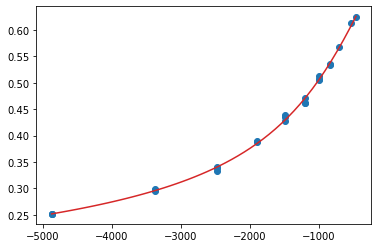

In [83]:
plt.plot(x_initial_data, y_initial_data, 'o')
x1 = np.linspace(x_initial_data[0], x_initial_data[24], 50)
plt.plot(x1, fnctn(x1, *form_gr), color = 'tab:red')
pass

## Построение графика, используя аппроксимацию полиномом
##### Полином (многочлен) 2-ой степени относительно рабочей точки

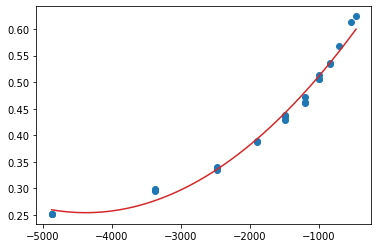

In [88]:
c = np.polyfit(x_initial_data, y_initial_data, 2)  
plt.plot(x_initial_data, y_initial_data, 'o')
x1 = np.linspace(x_initial_data[0], x_initial_data[24], 50)
y1 = np.polyval(c, x1)
plt.plot(x1, y1, color = 'tab:red')
pass

## Вывод по проделанной работе

###### Сравнивая два построенных графика, видно, что они разные. Поэтому делаем вывод,что методы имеют разную точность.